Stock Price Analyzer using ML and BigData
==

by Sun-il Kim. *2019-01-11*


**기본적인 빅데이터 머신러닝을 통한 주식 분석 예제입니다.**

>*어제에 이어 머신러닝 맛보기를 진행하겠습니다.*

>*뭔가 진행이 안되고 있다면 물어보시는게 50배 빠를 수 있습니다.*

1.SVM모델을 이용한 주식 가격 분석을 실시하세요. 
--
- 강의1) https://www.youtube.com/watch?v=SSu00IRRraY
- 강의2) https://www.youtube.com/watch?v=g8D5YL6cOSE&index=2&list=PL2-dafEMk2A7mu0bSksCGMJEmeddU_H4D
- 참고) https://github.com/mKausthub/stock-er
- 두 영상을 먼저 보시고 진행합니다. 

1-1. 필요한 CSV자료를 받아옵니다. 
--
- 예제 snap.csv -> https://drive.google.com/open?id=1lun35XsmPHaEtFmF5VbK-e9QIl5QGIo1
- 예제 aapls.csv -> https://drive.google.com/open?id=1d3gEhcHMMMjswtVpuZODj3hQmC6ms2oF
- *두 csv파일 모두 받아 .ipynb(주피터노트북 파일)이나 .py(파이썬파일) 폴더에 넣어두세요* 


- 기타) https://finance.yahoo.com/quote/ATVI/history?period1=1544367600&period2=1547046000&interval=1d&filter=history&frequency=1d
- 다른 데이터가 궁금하시면 해당 링크에서 받을 수 있습니다.
- 해당 링크는 블리자드이나, 상단에서 검색하고 기간 설정 후 Download하시면 됩니다. 

- 아직 기간은 1달정도가 적당합니다. (1년이나 10년 하시면 컴파일에 정말 10년이 걸릴 수 있습니다.)

1-3. 필요한 모듈을 설치합니다. 
--

아나콘다 프롬트에서 ***pip install {모듈이름}*** 으로 설치합니다.
- **csv** -> 보통 기본이나 가끔 기본설치만 하신 분들은 없을 수 있습니다. (말 그대로 CSV파일을 입출력하기 위해 사용됩니다.)
- **numpy** -> 기본적인 계산을 위해서 사용됩니다. 이번 경우 .reshape 을 통해 내부 데이터는 보존한 채로 형태나 차원을 바꾸는데 이용합니다. 
- **scikit-learn** -> 파이썬에서 가장 유명한 머신러닝 라이브러리입니다. 지도학습부터 각종 모델, 데이터 변환에서 전처리까지 다 하는 만능 라이브러리입니다.
- **matplotlib** -> TwitterAnalyzer에서 이야기 드렸듯, 일반적으로 그래프나 차트 등을 그리는 라이브러리입니다. 

1-4. 영상의 예제를 실습해 봅니다. 
==
```
# 주피터 노트북에서 matplotlib으로 frontend처럼 그래프를 띄우고자 하면 필요합니다.
# 없으면 그래프가 출력되지 않아 (많이) 고생하게 됩니다. 
%matplotlib inline

# 기본적인 모듈을 가져옵니다.
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

dates=[]
prices=[]

# 데이터를 CSV파일로부터 읽어오는 함수를 정의합니다.
def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            dates.append(int(row[0].split('-')[0]))
            prices.append(float(row[1]))
    return

# 데이터를 SVR 분석하는 함수를 정의합니다 
def predict_prices(dates, prices, x):
    dates = np.reshape(dates, (len(dates), 1))
    
    # 선형
    svr_lin = SVR(kernel= 'linear', C=1e3)
    # 다항
    svr_poly = SVR(kernel = 'poly', C=1e3, degree = 2)
    # RBF
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma='auto')
    
    # 데이터 훈련
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    # 데이터 표현
    plt.scatter(dates, prices, color='black', label='Data')
    plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF model')
    plt.plot(dates, svr_lin.predict(dates), color='green', label='Linear model')
    plt.plot(dates, svr_poly.predict(dates), color='blue', label='Polynomial model')
    # 그래프 레이블링
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    #훈련된 데이터 반환
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

# CSV 파일 지정
get_data('snap.csv')
# 데이터 훈련
predicted_price = predict_prices(dates, prices, 21)
# 데이터 표시
print(predicted_price)

```

1-5. 풀어볼 문제 
==

1. 상단의 예제에서 snaps.csv 파일과 aapls.csv 파일을 둘 다 실행해보자.
    - 왜 하나는 제대로 그래프가 표시가 안 되는가? 
2. dates = np.reshape(dates, (len(dates), 1)) 부분을 공부해보자. 
    - **.reshape**은 정확히 무엇을 하며, len(dates)가 어떻게 이용된 것인가?
    - 참고) https://www.youtube.com/watch?v=gNRADnAWCHA
   

****1-4의 예제를 각자의 주피터노트북에서 실습하여 보시고,****

****1-5의 문제를 푼 다음 개인적으로 심화 실습을 진행해 보세요.****



1-6. 개인 심화 실습
==
더욱 변화 시켜 보세요.
- 다른 SVR 모델, 다른 Scikit-learn 내의 모듈들, 다른 그래프 등등.
  - SVC? Isotonic? Johnson-Lindenstrauss bound?
- 어제 만든 트위터 단어 분석 서비스를 결합시킬 수 있을까요?
- 데이터는 자동으로 받아올 수 없을까요? 
- Machine Learning을 도입할 순 없을까요?

1.7. 제 실습을 주석과 함께 읽어보면서 이해하고 따라해 보세요.
==

<b>**먼저 데이터를 자동으로 받아와봅시다. Datareader를 사용합니다.**<b>

In [2]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
# pandas_datareader 패키지의 DataReader라는 함수는 웹 상의 데이터를 DataFrame 객체로 만드는 기능을 제공합니다.
import pandas_datareader.data as web

# 사용할 스타일을 설정하는 것인데, 이 외에도 많은 스타일이 있습니다. 
style.use('ggplot')

# 기준날자를 설정합니다.
start = dt.datetime(2000,1,1)
end = dt.datetime(2018,12,31)

# pandas_datareader로 온라인에서 바로 데이터를 데이터프레임형식으로 받아옵니다.
df = web.DataReader('TSLA', 'yahoo', start, end)
# 앞 5개 자료를 출력해 봅니다.
print (df.head(5))

             High        Low       Open      Close    Volume  Adj Close
Date                                                                   
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001


In [14]:
# 뒤 5개 자료를 출력해 봅니다. 
print (df.tail(5))

                  High         Low        Open       Close   Volume  \
Date                                                                  
2018-12-24  314.500000  295.200012  313.500000  295.390015  5559900   
2018-12-26  326.970001  294.089996  300.000000  326.089996  8163100   
2018-12-27  322.170013  301.500000  319.839996  316.130005  8575100   
2018-12-28  336.239990  318.410004  323.100006  333.869995  9939000   
2018-12-31  339.209991  325.260010  337.790009  332.799988  6302300   

             Adj Close  
Date                    
2018-12-24  295.390015  
2018-12-26  326.089996  
2018-12-27  316.130005  
2018-12-28  333.869995  
2018-12-31  332.799988  


In [9]:
# 주석을 지우면 해당 불러올 파일을 csv 파일로 빼는 것인데, 
# 이미 데이터프레임 형식으로 받아와 편리하게 저장됨을 알 수 있습니다. 
#df.to_csv('tsla.csv')

In [23]:
# 저장한 데이터를 다시 읽어옵니다. 
# parse_dates : 인덱스 열이나 복수 열의 날짜를 파싱할지 여부
# index_col : 기준이 되는 인덱스 열을 정의 
df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)
# 앞 3개 자료를 출력
print(df.head(3))
# 앞 3개의 자료 중 특정한 데이터를 특정한 순서로 출력 (상관없음)
print(df[['Open','High']].head(3))

             High        Low       Open      Close    Volume  Adj Close
Date                                                                   
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999
                 Open   High
Date                        
2010-06-29  19.000000  25.00
2010-06-30  25.790001  30.42
2010-07-01  25.000000  25.92


**Tesla의 데이터를 분석해보는 그래프를 그려봅시다.**

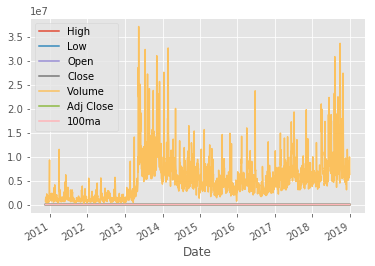

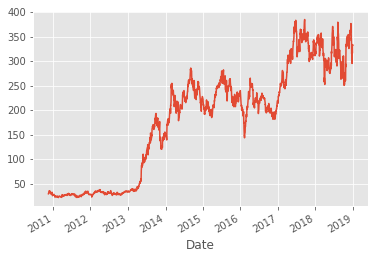

In [9]:
%matplotlib inline
# matplotlib 으로 그래프를 plot 하고 
df.plot()
# 역시 matplotlib 으로 그래프를 출력합니다. 
plt.show()

# 특정한 행을 지정하여 plot 하고 출력해 봅니다. 
df['Adj Close'].plot()
plt.show()

                  High         Low        Open       Close   Volume  \
Date                                                                  
2018-12-24  314.500000  295.200012  313.500000  295.390015  5559900   
2018-12-26  326.970001  294.089996  300.000000  326.089996  8163100   
2018-12-27  322.170013  301.500000  319.839996  316.130005  8575100   
2018-12-28  336.239990  318.410004  323.100006  333.869995  9939000   
2018-12-31  339.209991  325.260010  337.790009  332.799988  6302300   

             Adj Close     100ma  
Date                              
2018-12-24  295.390015  318.4833  
2018-12-26  326.089996  318.2488  
2018-12-27  316.130005  317.9284  
2018-12-28  333.869995  317.8472  
2018-12-31  332.799988  317.3795  


<IPython.core.display.Javascript object>


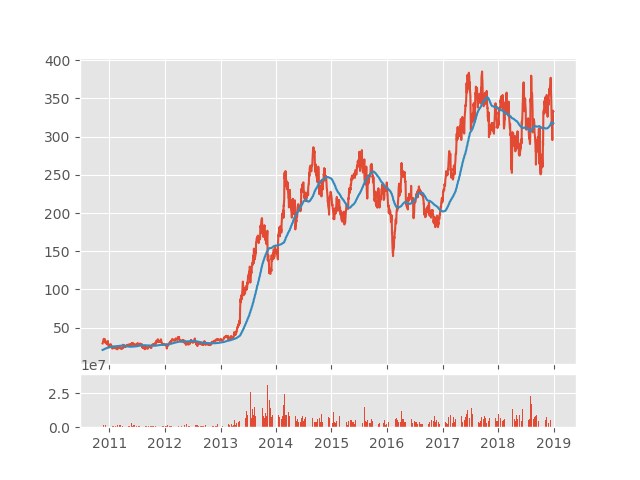

In [7]:
%matplotlib notebook
# '100ma' 부분은 특정한 열을 생성하는 것이고, 
# 그 뒷부분은 어떤 전처리를 할 지인데, Adj Close의 평균을 해 보았습니다. 
# 왜 df.head(100) 은 안 출력되는지도 이해해 보세요.
df['100ma'] = df['Adj Close'].rolling(window=100).mean()
df.dropna(inplace=True)
print(df.tail())

# 여러개의 sub-plot
# (6,1) -> 그리드 사이즈 (6행 1열)
# (0,0) -> 시작 포인트
#
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=5, colspan=1, sharex=ax1)

# 위에서 인덱스를 지정해 뒀기 때문에 불러올 수 있습니다. (그냥 date 지정해도 무방)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

       Date       open       high        low      close
0  733952.0  23.889999  23.889999  15.800000  17.459999
1  733962.0  17.400000  20.639999  17.049999  20.639999
2  733972.0  21.910000  21.910000  20.219999  20.719999
3  733982.0  20.350000  21.950001  19.590000  19.590000
4  733992.0  19.600000  19.600000  17.600000  19.150000


<IPython.core.display.Javascript object>


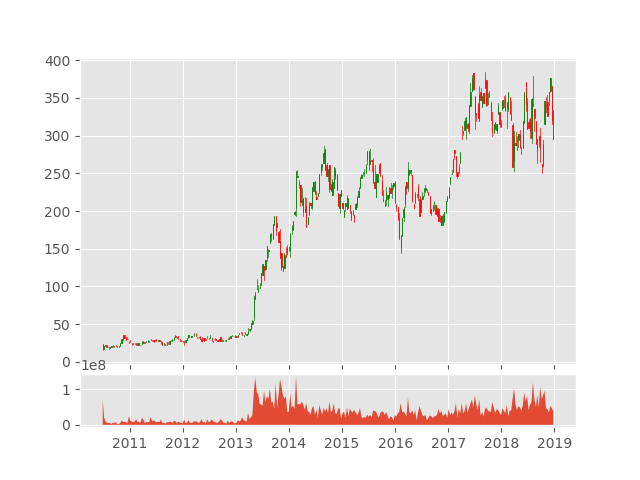

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
# candle 차트 표현을 위한 모듈
from mpl_finance import candlestick_ohlc
# 왠지 matplotlib은 정상적인 dates를 쓰지 않기때문에 불러옵니다.
import matplotlib.dates as mdates

# 데이터 전처리 방법 중 하나인 리셈플링을 해보겠습니다 (ms로 들어오는 정보를 종합)
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

# 인덱스를 리셋합니다.
df_ohlc.reset_index(inplace=True)

# 왠지 matplotlib은 이상한 mdates라는 날자를 쓰지만 그쪽으로 변환을 시켜줘야 합니다. 
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
# 날자가 70만대로 변환된걸 볼 수 있습니다. 
print(df_ohlc.head())

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=5, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
# mdates.date2num -> x
# df_volume.values -> y 이나 '0' 부터
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)

**이름도 지정하기 싫은 당신을 위해 아에 SP500 기업 리스트에서 기업 리스트를 빼와봅시다**
- 일종의 데이터 크롤링 기법입니다.

In [13]:
import bs4 as bs
# Serialize any Python Object
import pickle
import requests 

def save_sp500_tickers():
    # request를 사용하여 response 변수를 만들어 저장합니다.
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    # bs를 이용하여 받아온 자료에서 table이 어디 있는지 검색합니다.
    # 보통 페이지에는 테이블이 하나보다 많기 때문에 지정을 해줘야 합니다. 
    table = soup.find('table', {'class':'wikitable sortable'})
    tickers = []
    # 테이블에서 특정한 값, 이 경우에는 가장 좌측 인덱스가 회사명이기 때문에 이를 받아옵니다. 
    # tr, td 같은 경우는 기본적인 HTML 지식이 필요하다고 생각할 수 있으나, source code보기로 눌러 구성을 확인하면 됩니다. 
    for row in table.findAll('tr')[1:]:
        ticker=row.findAll('td')[0].text
        tickers.append(ticker)
        
    # wb는 바이트를 작성하기 위함이라는 지정입니다.  
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers,f)
    #print(tickers)
    return tickers

save_sp500_tickers()

# 모든 회사 코드를 빼왔습니다. 

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'APC',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BBT',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BHF',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CPRI',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CBS',
 'CE',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS

**받아온 기업들의 데이터를 한번에 다 받아와 전부 합친 데이터프레임을 만들어 봅시다.**
- 빅데이터 저장 방법을 배웁니다

In [62]:
import os
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else: # 읽을거기 때문에 rb입니다.
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
            
    # .이 이름에 포함된 기업은 일단 귀찮기 때문에 삭제했습니다.
    #tickers.remove('BRK.B')
    #tickers.remove('BF.B')
    # 한 번에 모든 데이터를 가져와 스토어링을 해야 합니다. 
    # 매번 받아올 수 없는 빅데이터이기 때문입니다.
    
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
        
    start = dt.datetime(2000,1,1)
    end = dt.datetime(2018,12,31)
    
    # 새로운 데이터 업데이트를 할 시, 매 번 다시 받아오지 않기 위함입니다.
    for ticker in tickers:
        print(ticker)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'yahoo', start, end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))
            
get_data_from_yahoo()            

MMM
Already have MMM
ABT
Already have ABT
ABBV
Already have ABBV
ABMD
Already have ABMD
ACN
Already have ACN
ATVI
Already have ATVI
ADBE
Already have ADBE
AMD
Already have AMD
AAP
Already have AAP
AES
Already have AES
AMG
Already have AMG
AFL
Already have AFL
A
Already have A
APD
Already have APD
AKAM
Already have AKAM
ALK
Already have ALK
ALB
Already have ALB
ARE
Already have ARE
ALXN
Already have ALXN
ALGN
Already have ALGN
ALLE
Already have ALLE
AGN
Already have AGN
ADS
Already have ADS
LNT
Already have LNT
ALL
Already have ALL
GOOGL
Already have GOOGL
GOOG
Already have GOOG
MO
Already have MO
AMZN
Already have AMZN
AEE
Already have AEE
AAL
Already have AAL
AEP
Already have AEP
AXP
Already have AXP
AIG
Already have AIG
AMT
Already have AMT
AWK
Already have AWK
AMP
Already have AMP
ABC
Already have ABC
AME
Already have AME
AMGN
Already have AMGN
APH
Already have APH
APC
Already have APC
ADI
Already have ADI
ANSS
Already have ANSS
ANTM
Already have ANTM
AON
Already have AON
AOS
Alread

In [67]:
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers=pickle.load(f)
    # 오래된 데이터를 가져오면 안되기 때문에 고려합니다.
    main_df = pd.DataFrame()
    tickers.remove('BRK.B')
    tickers.remove('BF.B')
    for count,ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)
        
        # 딕셔너리라 : 로 지정합니다
        df.rename(columns = {'Adj Close':ticker}, inplace=True)
        df.drop(['Open','High','Low','Close','Volume'],1,inplace=True)
        
        # 형식이 다르기 때문에 고려합니다.
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')
            
        # 좀 적게 출력되기 위해
        if count % 100 == 0:
            print(count)
            
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')

compile_data()

# 2000년도 당시 없던 데이터도 있기 때문에 NaN으로 안 보이는 데이터가 있을 수 있습니다.
# tail로 확인하시면 다 있을 것입니다. 

0
100
200
300
400
500
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
1999-12-31  28.500353  6.982380   NaN  18.37500  NaN  1.160307  16.561329   
2000-01-03  27.481184  6.730005   NaN  18.25000  NaN  1.245554  16.145748   
2000-01-04  26.389219  6.537722   NaN  17.81250  NaN  1.207666  14.791295   
2000-01-05  27.153585  6.525703   NaN  18.00000  NaN  1.212402  15.083735   
2000-01-06  29.337526  6.754039   NaN  18.03125  NaN  1.188722  15.206868   

                 AMD  AAP        AES ...   WLTW  WYNN       XEL        XRX  \
Date                                 ...                                     
1999-12-31  14.46875  NaN  30.654034 ...    NaN   NaN  8.263513  50.831738   
2000-01-03  15.50000  NaN  29.731331 ...    NaN   NaN  8.051626  54.192524   
2000-01-04  14.62500  NaN  28.552334 ...    NaN   NaN  8.237025  51.671932   
2000-01-05  15.00000  NaN  28.859903 ...    NaN 

**간단한 데이터 연관성 분석을 해봅니다.**

In [70]:
def corr_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    #df['AAPL'].plot()
    #plt.show()
    # 모든 데이터를 비교하여 연관도를 찾습니다. 
    
    df_corr = df.corr()
    
    print(df_corr.head())
    
corr_data()

 # 1은 많은 연관성 -1은 아주 적은 연관성인 관계입니다.
 # 보통 이것만으로도 사업을 하는 분들이 있습니다. 

           MMM       ABT      ABBV      ABMD       ACN      ATVI      ADBE  \
MMM   1.000000  0.959259  0.928056  0.800353  0.977950  0.944360  0.900472   
ABT   0.959259  1.000000  0.927612  0.827434  0.977862  0.921211  0.907684   
ABBV  0.928056  0.927612  1.000000  0.890192  0.937002  0.916156  0.932840   
ABMD  0.800353  0.827434  0.890192  1.000000  0.866375  0.909445  0.967664   
ACN   0.977950  0.977862  0.937002  0.866375  1.000000  0.955349  0.930986   

           AMD       AAP       AES    ...         WLTW      WYNN       XEL  \
MMM  -0.242244  0.861082 -0.236166    ...     0.940636  0.718175  0.967878   
ABT  -0.283949  0.879449 -0.199726    ...     0.901704  0.757615  0.962640   
ABBV  0.750110  0.189895  0.328430    ...     0.934438  0.223240  0.856042   
ABMD  0.080945  0.615235 -0.023917    ...     0.782162  0.488684  0.806168   
ACN  -0.118425  0.867472  0.094600    ...     0.926112  0.718162  0.982373   

           XRX      XLNX       XYL       YUM       ZBH      ZI

<IPython.core.display.Javascript object>


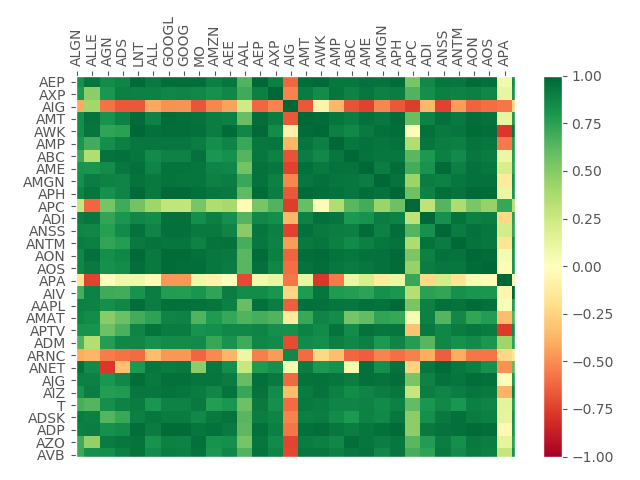

In [10]:
%matplotlib notebook
import numpy as np
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    #df['AAPL'].plot()
    #plt.show()
    # 모든 데이터를 비교하여 연관도를 찾습니다. 
    # 1은 많은 연관성 -1은 아주 적은 연관성인 관계입니다. 
    df_corr = df.corr()
    # print(df_corr.head())
    
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    heatmap = ax.pcolor(data, cmap=plt.cm.get_cmap('RdYlGn'))
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)
    
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    
    plt.tight_layout()
    plt.show()
    
visualize_data()

# 20년간의 빅데이터로 SP500 기업간의 연관성을 heatmap으로 표현하는 것 까지 해보았습니다. 
# 주피터 노트북 안에 넣고자 이쁘지 않게 출력되었고, 